In [275]:
import numpy as np
import os,sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [276]:
df_credit=pd.read_csv("raw_data/credit_applications.csv",index_col=0)

In [277]:
df_credit.head()

,client_nr,yearmonth,credit_application,nr_credit_applications
1,1,201401,0,0
2,1,201402,0,0
3,1,201403,0,0
4,1,201404,0,0
5,1,201405,0,0


In [278]:
df_customers=pd.read_csv("raw_data/customers.csv",index_col=0)

In [279]:
df_customers.head()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG
1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0
2,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0
3,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0
4,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0
5,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0


In [280]:
len(df_credit)

29996

In [281]:
len(df_customers)

29996

In [282]:
df_customers['CRG'].isnull().sum()

5537

In [283]:
crg_median=df_customers['CRG'].median()

In [284]:
df_customers['CRG'].fillna(crg_median,inplace=True)

In [285]:
df_customers['CRG'].isnull().sum()

0

In [286]:
full_df = df_customers.merge(df_credit, on=["client_nr","yearmonth"], how="left")

In [287]:
full_df.head()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
0,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,0,0
1,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0,0,0
2,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0,0,0
3,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0,0,0
4,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0,0,0


In [14]:
len(full_df)

29996

In [288]:
merged_df_sorted=full_df.sort_values(by=['client_nr','yearmonth'])

In [289]:
merged_df_sorted[merged_df_sorted['client_nr'] ==18]

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
544,18,201401,377,151,29266166,226,42693872,-27268875,5985640,1.0,1,1
545,18,201402,348,132,39093976,216,36613715,-23773852,5451836,1.0,0,0
546,18,201403,340,103,36932793,237,28760291,-31003799,5159387,1.0,1,3
547,18,201404,298,80,70944119,218,72347441,-51495305,5164268,1.0,0,0
548,18,201405,232,70,27722779,162,27097079,-26205139,2383638,1.0,0,0
549,18,201406,384,79,28811102,305,32814990,-26675058,1215194,1.0,0,0
550,18,201407,353,75,34464984,278,35572517,-25815218,908422,1.0,0,0
551,18,201408,360,117,42403374,243,39392457,-28149812,865244,1.0,0,0
552,18,201409,311,85,44274249,226,32676392,-33139669,1363436,1.0,0,0
553,18,201410,345,110,39167778,235,39000645,-33795218,2325151,1.0,1,1


In [17]:
label_dist=merged_df_sorted['credit_application'].mean()

In [18]:
label_dist

0.06750900120016003

In [19]:
client_label_dist=merged_df_sorted.groupby('client_nr')['credit_application'].mean().reset_index()

In [20]:
client_label_dist

,client_nr,credit_application
0,1,0.00000
1,2,0.00000
2,3,0.12500
3,4,0.03125
4,5,0.00000
...,...,...
987,996,0.00000
988,997,0.00000
989,998,0.00000
990,999,0.00000


In [21]:
client_label_dist['stratum']=(client_label_dist['credit_application']>label_dist).astype(int)

In [22]:
client_label_dist

,client_nr,credit_application,stratum
0,1,0.00000,0
1,2,0.00000,0
2,3,0.12500,1
3,4,0.03125,0
4,5,0.00000,0
...,...,...,...
987,996,0.00000,0
988,997,0.00000,0
989,998,0.00000,0
990,999,0.00000,0


In [23]:
client_train,client_test=train_test_split(client_label_dist['client_nr'],test_size=0.2,stratify=client_label_dist['stratum'],random_state=42)

In [24]:
train_df=merged_df_sorted[merged_df_sorted['client_nr'].isin(client_train)]
test_df=merged_df_sorted[merged_df_sorted['client_nr'].isin(client_test)]

In [25]:
set(test_df['client_nr'])

{2,
 3,
 6,
 15,
 19,
 20,
 21,
 28,
 29,
 30,
 37,
 38,
 39,
 44,
 45,
 48,
 49,
 52,
 58,
 67,
 70,
 73,
 80,
 87,
 91,
 93,
 104,
 111,
 118,
 126,
 131,
 132,
 137,
 141,
 142,
 143,
 148,
 153,
 154,
 158,
 163,
 164,
 167,
 183,
 190,
 193,
 199,
 206,
 215,
 225,
 232,
 242,
 245,
 246,
 247,
 255,
 260,
 262,
 286,
 290,
 297,
 314,
 315,
 320,
 321,
 329,
 333,
 334,
 337,
 338,
 345,
 361,
 373,
 376,
 377,
 380,
 382,
 393,
 394,
 401,
 403,
 408,
 414,
 417,
 418,
 419,
 421,
 426,
 429,
 445,
 446,
 455,
 460,
 468,
 476,
 482,
 484,
 498,
 503,
 509,
 515,
 516,
 518,
 522,
 531,
 533,
 534,
 559,
 562,
 565,
 568,
 574,
 579,
 580,
 587,
 589,
 592,
 593,
 596,
 602,
 604,
 610,
 611,
 614,
 619,
 628,
 629,
 639,
 640,
 646,
 648,
 649,
 654,
 661,
 663,
 674,
 675,
 678,
 682,
 696,
 697,
 699,
 704,
 713,
 717,
 719,
 722,
 723,
 725,
 730,
 732,
 740,
 743,
 749,
 753,
 754,
 757,
 767,
 773,
 776,
 779,
 782,
 783,
 789,
 791,
 800,
 803,
 812,
 815,
 818,
 828,
 83

In [26]:
test_df['credit_application'].mean()

0.06769281694803045

- total_nr_trx: Total number of transactions
- nr_debit_trx: Number of debit transactions
- volume_debit_trx: Volume of debit transactions
- nr_credit_trx: Number of credit transactions
- volume_credit_trx: Volume of credit transactions
- min_balance: Minimum balance
- max_balance: Maximum balance
- CRG: Credit Risk Grade (assuming this is what CRG stands for)

In [27]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29996 entries, 0 to 29995
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_nr               29996 non-null  int64  
 1   yearmonth               29996 non-null  int64  
 2   total_nr_trx            29996 non-null  int64  
 3   nr_debit_trx            29996 non-null  int64  
 4   volume_debit_trx        29996 non-null  int64  
 5   nr_credit_trx           29996 non-null  int64  
 6   volume_credit_trx       29996 non-null  int64  
 7   min_balance             29996 non-null  int64  
 8   max_balance             29996 non-null  int64  
 9   CRG                     29996 non-null  float64
 10  credit_application      29996 non-null  int64  
 11  nr_credit_applications  29996 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


In [28]:
full_df.describe()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
count,29996.000000,29996.000000,29996.000000,29996.000000,2.999600e+04,29996.000000,2.999600e+04,2.999600e+04,2.999600e+04,29996.000000,29996.000000,29996.000000
mean,481.560775,201493.675157,166.427957,75.785571,1.121290e+07,90.642386,1.126906e+07,-5.523773e+06,3.752693e+06,3.205361,0.067509,0.087078
std,281.317753,77.361645,220.947519,60.063496,1.617596e+07,192.244770,1.624998e+07,1.357517e+07,1.616937e+07,1.708680,0.250906,0.364473
min,1.000000,201401.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-3.467127e+08,-2.485206e+08,1.000000,0.000000,0.000000
25%,237.000000,201409.000000,76.000000,38.000000,3.072750e+06,33.000000,3.148068e+06,-7.895864e+06,-1.868002e+06,2.000000,0.000000,0.000000
50%,479.000000,201505.000000,129.000000,66.000000,6.822769e+06,56.000000,6.934694e+06,-2.957198e+06,1.040998e+06,3.000000,0.000000,0.000000
75%,721.000000,201601.000000,205.000000,101.000000,1.386656e+07,102.000000,1.394257e+07,1.690275e+04,5.806224e+06,3.000000,0.000000,0.000000
max,1000.000000,201608.000000,6341.000000,1590.000000,7.980480e+08,6325.000000,8.775321e+08,2.109783e+08,3.722319e+08,7.000000,1.000000,7.000000


In [29]:
full_df.isnull().sum()

client_nr                 0
yearmonth                 0
total_nr_trx              0
nr_debit_trx              0
volume_debit_trx          0
nr_credit_trx             0
volume_credit_trx         0
min_balance               0
max_balance               0
CRG                       0
credit_application        0
nr_credit_applications    0
dtype: int64

In [30]:
full_df['CRG'].isnull().sum(), 

(0,)

In [31]:
## Feature Engineering

In [32]:
full_df['trx_volume_ratio']= (full_df['volume_debit_trx'])/(full_df['volume_credit_trx']+1)

In [33]:
# Visualize the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
numerical_columns = full_df.select_dtypes(include=['int', 'float']).columns

In [35]:
full_df.columns

Index(['client_nr', 'yearmonth', 'total_nr_trx', 'nr_debit_trx',
       'volume_debit_trx', 'nr_credit_trx', 'volume_credit_trx', 'min_balance',
       'max_balance', 'CRG', 'credit_application', 'nr_credit_applications',
       'trx_volume_ratio'],
      dtype='object')

<Axes: xlabel='min_balance', ylabel='Count'>

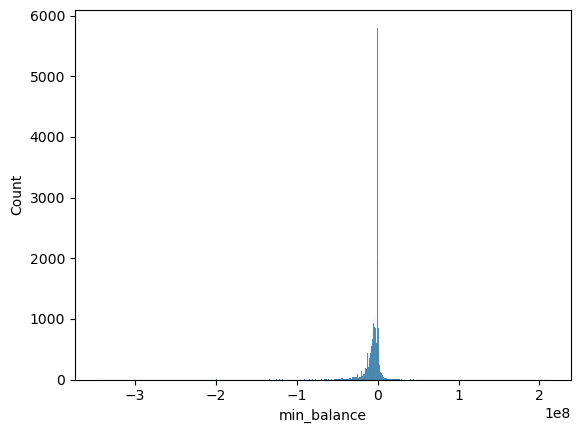

In [36]:
sns.histplot(full_df['min_balance'])

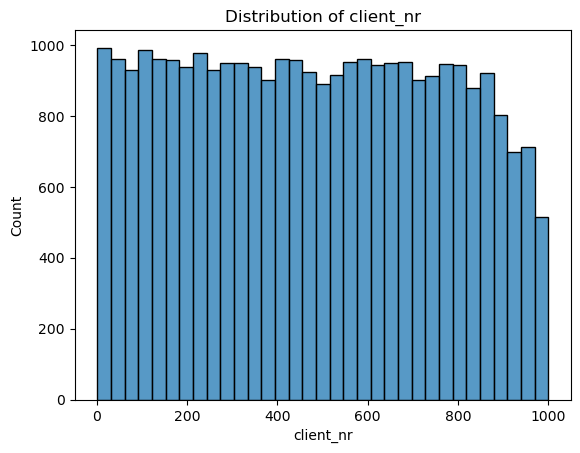

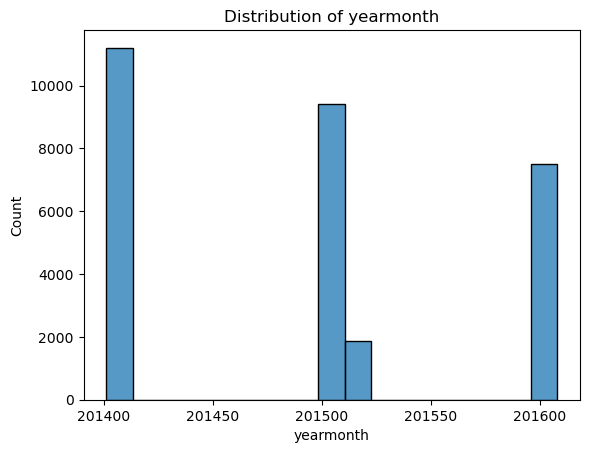

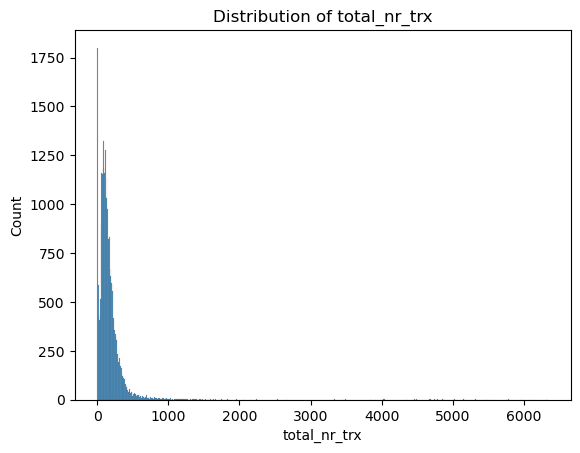

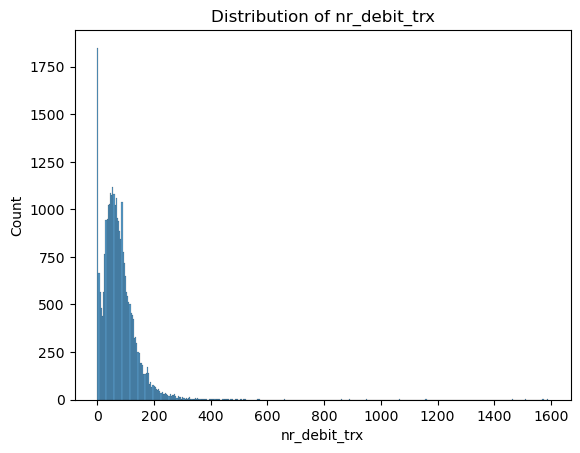

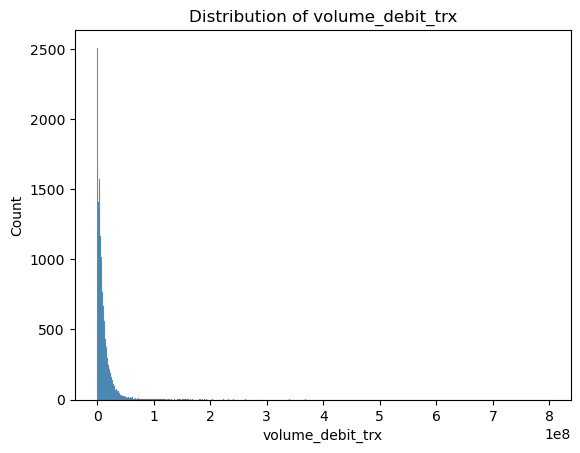

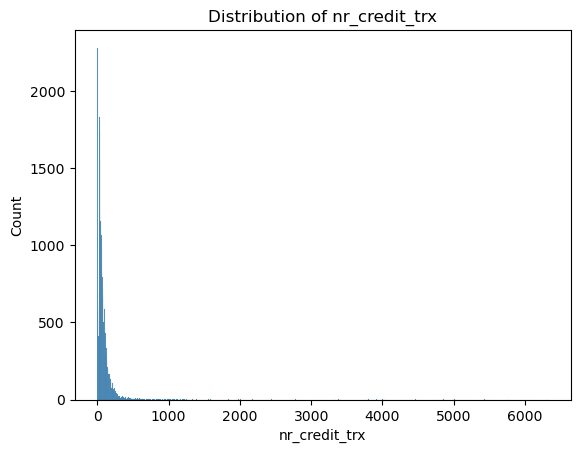

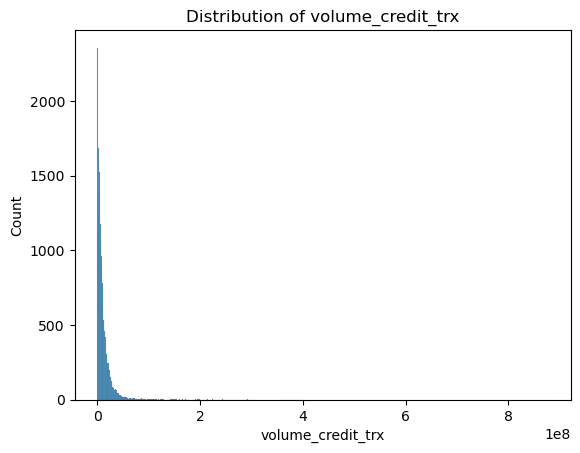

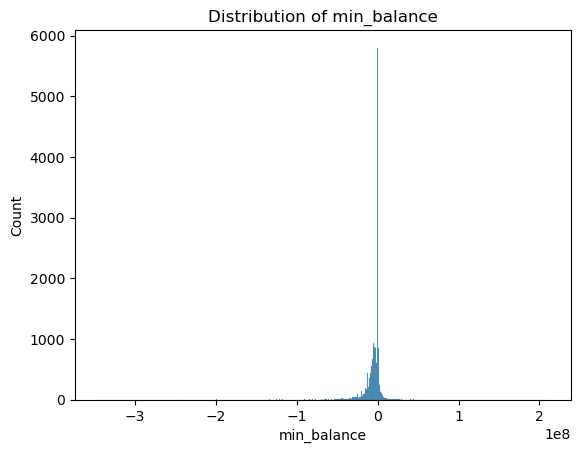

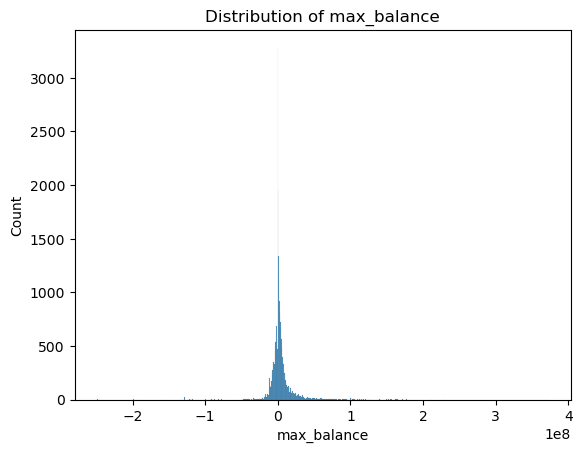

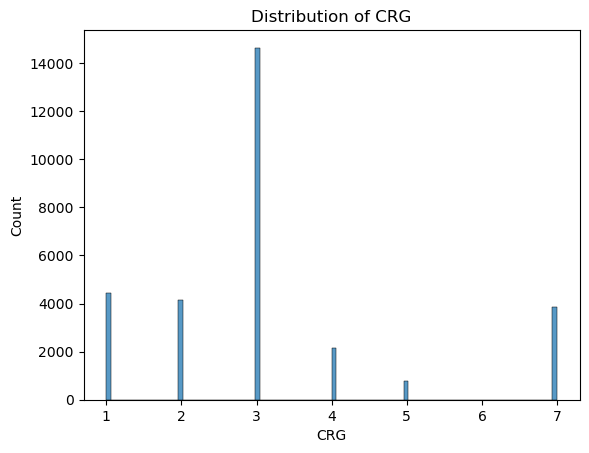

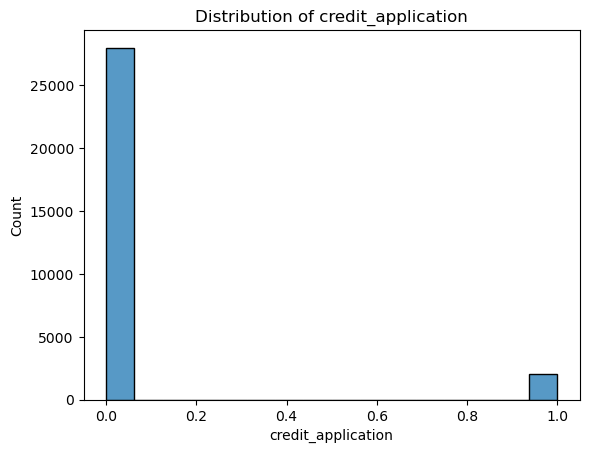

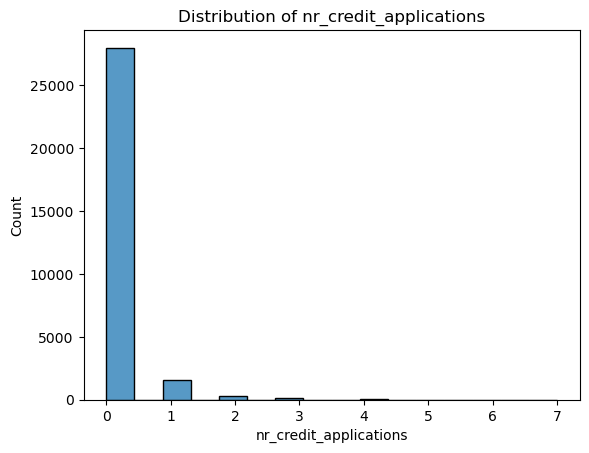

MemoryError: Unable to allocate 151. GiB for an array with shape (20210893725,) and data type float64

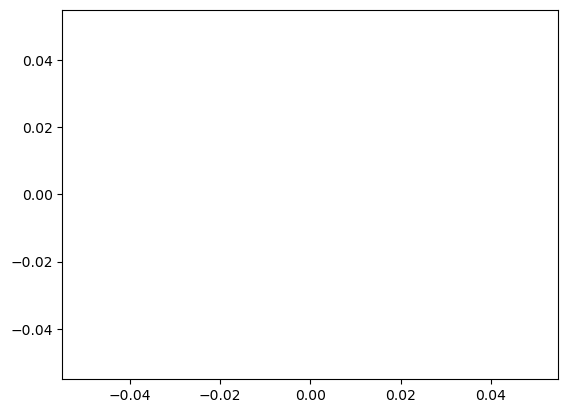

In [37]:
for column in numerical_columns:
    plt.figure()
    sns.histplot(full_df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
#! pip install xgboost

In [290]:
import xgboost as xgb

In [291]:
X_train= train_df.drop(['client_nr','yearmonth','credit_application','nr_credit_applications'],axis=1)
y_train= train_df['credit_application']

In [292]:
X_test= test_df.drop(['client_nr','yearmonth','credit_application','nr_credit_applications'],axis=1)
y_test= test_df['credit_application']

In [293]:
(sum(y_train==0)/len(y_train))

0.9306670613045248

In [294]:
(sum(y_test==1)/len(y_test))

0.05089315807212673

In [295]:
model= xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')

In [296]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [297]:
y_pred=model.predict(X_test)

In [298]:
y_pred_proba =model.predict_proba(X_test)[:,1]

In [299]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.9477586788001349

In [300]:
roc_auc =roc_auc_score(y_test,y_pred_proba)

In [301]:
roc_auc

0.7161442655027092

In [302]:
report =classification_report(y_test,y_pred,output_dict=True)

In [303]:
report_df= pd.DataFrame(report).transpose()

In [304]:
report_df

,precision,recall,f1-score,support
0,0.949645,0.997869,0.973160,2816.000000
1,0.250000,0.013245,0.025157,151.000000
accuracy,0.947759,0.947759,0.947759,0.947759
macro avg,0.599823,0.505557,0.499159,2967.000000
weighted avg,0.914038,0.947759,0.924913,2967.000000


In [305]:
cm=confusion_matrix(y_test,y_pred)

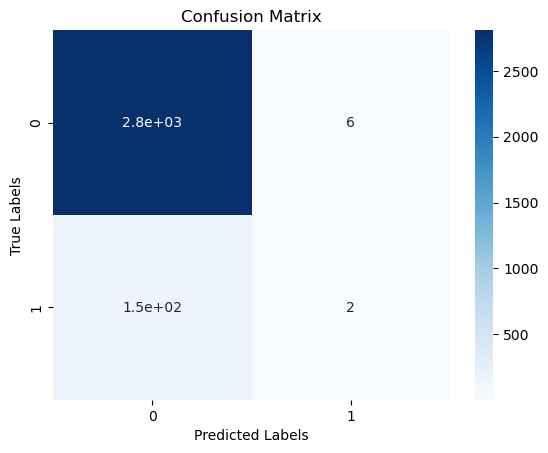

In [306]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=True,yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [307]:
credit_applications_df=pd.read_csv("raw_data/credit_applications.csv",index_col=0)

In [308]:
customers_df=pd.read_csv("raw_data/customers.csv",index_col=0)

In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load datasets (Assuming they are already loaded as 'customers_df' and 'credit_applications_df')

# Preprocessing Function: Merge, Clean, and Engineer Features
def preprocess_features(customers_df, credit_applications_df):
    # Merge datasets
    merged_df = pd.merge(customers_df, credit_applications_df, on=['client_nr', 'yearmonth'])
    
    # sort by client_nr
    merged_df=merged_df.sort_values(by=['client_nr','yearmonth'])
    # Drop unnecessary 'Unnamed: 0' column if exists
    #merged_df.drop(columns=[col for col in merged_df.columns if 'Unnamed' in col], inplace=True)
   
    # Handle missing values in 'CRG' with median or a specific strategy
    merged_df['CRG'] = merged_df['CRG'].fillna(merged_df['CRG'].median())
   
    # Temporal Features
    #merged_df['year'] = merged_df['yearmonth'] // 100
    #merged_df['month'] = merged_df['yearmonth'] % 100
    #merged_df['time_since_start'] = (merged_df['year'] - merged_df['year'].min()) * 12 + (merged_df['month'] - merged_df['month'].min())
   
    # Additional Feature Engineering
    #merged_df['balance_range'] = merged_df['max_balance'] - merged_df['min_balance']
    #merged_df['credit_to_debit_ratio_volume'] = np.where(merged_df['volume_debit_trx'] == 0, 0, merged_df['volume_credit_trx'] / merged_df['volume_debit_trx'])
    #merged_df['credit_to_debit_ratio_count'] = np.where(merged_df['nr_debit_trx'] == 0, 0, merged_df['nr_credit_trx'] / merged_df['nr_debit_trx'])
   
    # Drop the original 'yearmonth', 'year', 'month' columns as we've extracted necessary features
    #final_df = merged_df.drop(columns=['yearmonth', 'year', 'month'])
    #final_df = merged_df.drop(columns=['yearmonth'])
   
    return merged_df


In [334]:
# Apply preprocessing and feature engineering
final_df = preprocess_features(customers_df, credit_applications_df)

In [335]:
final_df.head()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
0,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,0,0
1,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0,0,0
2,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0,0,0
3,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0,0,0
4,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0,0,0


In [336]:
final_df.columns

Index(['client_nr', 'yearmonth', 'total_nr_trx', 'nr_debit_trx',
       'volume_debit_trx', 'nr_credit_trx', 'volume_credit_trx', 'min_balance',
       'max_balance', 'CRG', 'credit_application', 'nr_credit_applications'],
      dtype='object')

In [337]:
len(final_df)

29996

In [338]:
def last_row_per_user_train_test_split(df):
    # Sort the dataframe by 'client_nr' and 'yearmonth' in ascending order
    #df_sorted = df.sort_values(by=['client_nr', 'yearmonth'], ascending=[True, True])
    df_sorted=df
    # Get the last entry for each 'client_nr' as the test set
    test_df = df_sorted.groupby('client_nr').tail(3)
    
    # Use the remaining data as the training set
    train_df = df_sorted.drop(test_df.index)
    
    return train_df, test_df

In [339]:
train_df,test_df=last_row_per_user_train_test_split(final_df)

In [340]:
len(train_df),len(test_df)

(27029, 2967)

In [341]:
test_df

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
29,1,201606,23,21,250012,2,47701,-10868626,1585224,1.0,0,0
30,1,201607,39,33,578297,6,178219,-11189619,12750338,1.0,0,0
31,1,201608,30,24,308413,6,1522424,-11158819,1354230,1.0,0,0
61,2,201606,107,41,11874991,66,13820289,-3084669,4929789,1.0,0,0
62,2,201607,115,37,18309618,78,14840489,-5188098,63536435,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29963,999,201607,72,26,13102415,46,15992072,15273687,21667760,3.0,0,0
29964,999,201608,57,18,5532314,39,10458066,18582234,25861612,3.0,0,0
29993,1000,201606,4,3,1211270,1,605000,127646,1338916,3.0,0,0
29994,1000,201607,4,2,606253,2,920000,441393,1047646,3.0,0,0


In [342]:
test_df['credit_application'].mean()*100

5.089315807212673

In [343]:
train_df['credit_application'].mean()*100

6.933293869547523

In [344]:
train_df[train_df['client_nr']==1]

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
0,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,0,0
1,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0,0,0
2,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0,0,0
3,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0,0,0
4,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0,0,0
5,1,201406,74,51,2083142,23,3241073,-15927514,2000000,1.0,0,0
6,1,201407,76,59,2538771,17,4564281,-15823639,2005161,1.0,0,0
7,1,201408,62,40,2620143,22,4280647,-14468191,1750000,1.0,0,0
8,1,201409,90,49,2500177,41,8339304,-12025540,1600000,1.0,0,0
9,1,201410,112,68,5848714,44,17013661,-7211508,7819451,1.0,0,0


In [345]:
(len(test_df)/len(train_df))*100

10.97709867179696

In [346]:
# Splitting the data into features (X) and target (y) for binary prediction (credit_application)
X_train = train_df.drop(columns=['credit_application', 'nr_credit_applications','client_nr','yearmonth'])
y_train = train_df['credit_application']
# Splitting the data into features (X) and target (y) for binary prediction (credit_application)
X_test = test_df.drop(columns=['credit_application', 'nr_credit_applications','client_nr','yearmonth'])
y_test = test_df['credit_application']

In [347]:
from imblearn.over_sampling import SMOTE

In [348]:
smote = SMOTE(random_state=42)

In [349]:
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [350]:
#! pip install imblearn

In [351]:
X_train.head()

,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG
0,97,50,6527929,47,7454863,-7914288,25110651,1.0
1,88,59,3475918,29,1895848,-8448513,25036651,1.0
2,96,62,31316405,34,20083583,-10347650,18020151,1.0
3,83,53,18669967,30,1091295,-15385039,13318200,1.0
4,94,54,2893905,40,2034075,-15682170,2350000,1.0


In [352]:
set(final_df.columns.tolist())-set(X_train.columns.tolist())

{'client_nr', 'credit_application', 'nr_credit_applications', 'yearmonth'}

In [353]:
set(X['client_nr'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [354]:
class_weights = y_train.value_counts().max() / y_train.value_counts()

In [355]:
class_weights

credit_application
0     1.000000
1    13.423159
Name: count, dtype: float64

In [356]:
y_train.value_counts().max()

25155

In [357]:
import xgboost as xgb

In [358]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred, y_pred_proba):
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return recall, precision, roc_auc, cm

In [359]:
dtrain = xgb.DMatrix(X_train, label=y_train, weight=y_train.map(class_weights))
#dtrain = xgb.DMatrix(X_train, label=y_train)

In [369]:
# Set up parameters for xgboost
params = {
    'objective': 'binary:logistic',  # Change to 'multi:softmax' if you have more than two classes and set 'num_class'
    'eval_metric': 'logloss',        # Evaluation metric
    # Add other parameters as needed
}

# Train the model
#num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain)

# Predict on the test set
dtest = xgb.DMatrix(X_test)
y_pred_proba = bst.predict(dtest)
y_pred = (y_pred_proba >= 0.2).astype(int)  # Convert probabilities to binary output


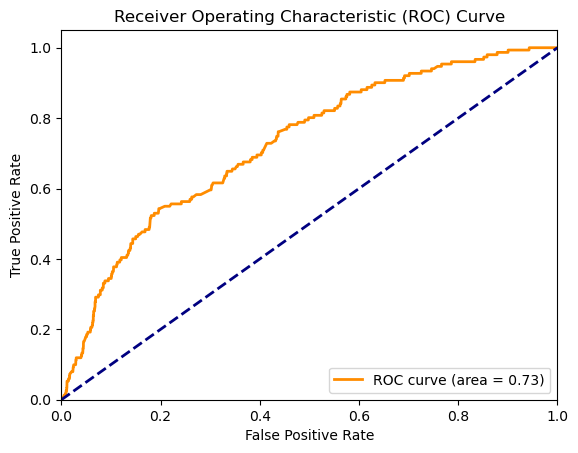

Recall: 0.93
Precision: 0.06
ROC AUC: 0.73
Confusion Matrix:
[[ 737 2079]
 [  10  141]]


In [370]:
recall, precision, roc_auc, cm = evaluate_classification(y_test, y_pred, y_pred_proba)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)

In [250]:
from sklearn.model_selection import GridSearchCV

In [252]:
scale_pos_weight=class_weights[1]

In [363]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None,5,10],
    'scale_pos_weight': [13, 5, 2]
}

In [364]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

In [365]:
xgb_gs = GridSearchCV(xgb_clf, xgb_params, cv=3, scoring='roc_auc',verbose=3)

In [366]:
xgb_gs.fit(X_train,y_train)
print("Best XGBoost Params: ", xgb_gs.best_params_)
print("Best XGBoost Score: ", xgb_gs.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=13;, score=0.677 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=13;, score=0.634 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=13;, score=0.688 total time=   0.2s
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=5;, score=0.678 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=5;, score=0.634 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=5;, score=0.694 total time=   0.2s
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=2;, score=0.678 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=100, scale_pos_weight=2;, score=0.633 to

[CV 2/3] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=2;, score=0.590 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=2;, score=0.666 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=13;, score=0.646 total time=   1.0s
[CV 2/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=13;, score=0.582 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=13;, score=0.652 total time=   1.2s
[CV 1/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=5;, score=0.654 total time=   1.1s
[CV 2/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=5;, score=0.588 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=5;, score=0.659 total time=   1.2s
[CV 1/3] END learning_rate=0.01, max_depth=10, n_estimators=3

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=2;, score=0.642 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=2;, score=0.589 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=2;, score=0.649 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=13;, score=0.640 total time=   0.7s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=13;, score=0.567 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=13;, score=0.633 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=5;, score=0.637 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=5;, score=0.573 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, scale

[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=300, scale_pos_weight=5;, score=0.645 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=300, scale_pos_weight=2;, score=0.631 total time=   0.4s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=300, scale_pos_weight=2;, score=0.587 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=300, scale_pos_weight=2;, score=0.645 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=13;, score=0.626 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=13;, score=0.561 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=13;, score=0.617 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=5;, score=0.635 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos

In [269]:
best_model = xgb_gs.best_estimator_
test_pred = best_model.predict(X_test)  # Class predictions
test_pred_proba = best_model.predict_proba(X_test)[:, 1] 

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


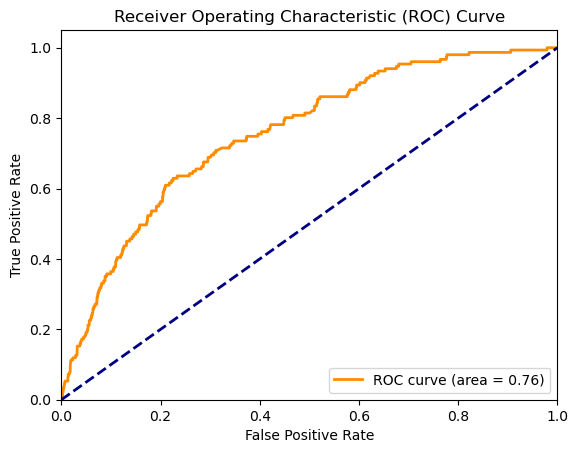

Recall: 0.00
Precision: 0.00
ROC AUC: 0.76
Confusion Matrix:
[[2816    0]
 [ 151    0]]


In [362]:
recall, precision, roc_auc, cm = evaluate_classification(y_test, test_pred , test_pred_proba)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)

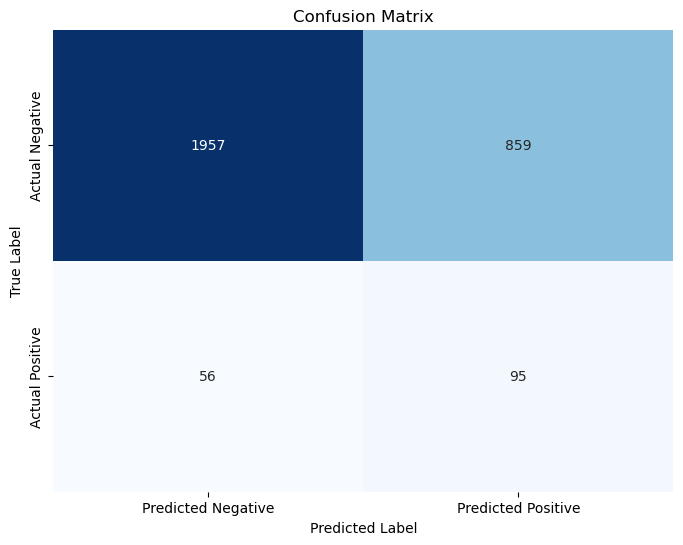

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()